# 1) To set up your own data cleaning pipeline

In [1]:
#Load the datasets
def read_dataset(name): #when only one dataset is provided as input
    import pandas as pd
    if name == "gpsa":
        df = pd.read_csv('../datasets/googleplaystore.csv', sep=',', encoding ='ISO-8859-1')
    elif name == "gpsu":
        df = pd.read_csv('../datasets/googleplaystore_reviews.csv', sep=',',encoding = 'ISO-8859-1')  
    elif name == "titanic":
        df = pd.read_csv('../datasets/titanic/titanic_train.csv', sep=',', encoding ='ISO-8859-1')
    elif name == "house":
        df = pd.read_csv('../datasets/house/house_train.csv', sep=',', encoding ='ISO-8859-1')
    else: 
        raise ValueError('Invalid dataset name')               
    return df


In [2]:
read_dataset("gpsu").head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## - Loading your data

In [3]:
import learn2clean.loading.reader as rd 
import learn2clean.normalization.normalizer as nl 
import pandas as pd

# executing profiling function for one dataset as input
rd.profile_summary(read_dataset('gpsu'), plot=False)


Profiling datasets
                Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness  Kurtosis
0      Sentiment_Polarity  float64              26863.0              6196.0  -0.10457655084633158  0.646756
1  Sentiment_Subjectivity  float64              26863.0              4531.0   -0.3063336025424886 -0.282853
2                     App   object                  0.0              1074.0                   N/A       N/A
3       Translated_Review   object              26868.0             27995.0                   N/A       N/A
4               Sentiment   object              26863.0                 4.0                   N/A       N/A


In [4]:

read_dataset('gpsu')['Sentiment'].head() # the target variable is numerical 


0    Positive
1    Positive
2         NaN
3    Positive
4    Positive
Name: Sentiment, dtype: object

In [5]:
# encoding of the target variable
import learn2clean.loading.reader as rd 
d_enc = rd.Reader(sep=',',verbose=True, encoding=True) 

gpsu  = ["../datasets/googleplaystore_reviews.csv"]
gpsu_encoded = d_enc.train_test_split(gpsu, 'Sentiment')
gpsu_encoded['train'].head()
gpsu_encoded['test'].head()


Reading csv : googleplaystore_reviews.csv ...
Reading data ...
CPU time: 3.4973549842834473 seconds
Profiling datasets
                Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness  Kurtosis
0      Sentiment_Polarity  float64              26863.0              6196.0  -0.10457655084633158  0.646756
1  Sentiment_Subjectivity  float64              26863.0              4531.0   -0.3063336025424886 -0.282853
2                     App   object                  0.0              1074.0                   N/A       N/A
3       Translated_Review   object              26868.0             27995.0                   N/A       N/A
4               Sentiment   object              26863.0                 4.0                   N/A       N/A

> Number of categorical features in the training set: 3
> Number of numerical features in the training set: 2
> Number of data samples : 64295

> Top sparse features (% missing values on dataset set):
Translated_Review         41.8

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
15169,"Black Wallpaper, AMOLED, Dark Background: Darkify",NaN,3,NaN,NaN
59743,Hangouts,"Hangouts amazing pretty much superior similar system. Aside occasional bugs (which might fault),...",2,0.259091,0.619444
15430,"Bleacher Report: sports news, scores, & highlights",NaN,3,NaN,NaN
14951,BioLife Plasma Services,"works great actually logs in, there's issues connection says email exist. Promotions dont work p...",2,0.260000,0.350000
1422,8 Ball Pool,"The better pool game Google Play slightly buggy. When opponent's connection stable, suddenly say...",0,-0.013333,0.413333


## - Normalize your data

In [6]:
# >> Examples of normalization
# The choice for the normalizer : 'ZS', 'MM','DS' or 'Log10'
#    Available strategies=
#       - 'ZS' z-score normalization
#       - 'MM' MinMax scaling
#       - 'DS' decimal scaling
#       - 'Log10 log10 scaling

import learn2clean.normalization.normalizer as nl 

# MM normalization with exclude = None, all numeric variables will be normalized
n1= nl.Normalizer(gpsu_encoded.copy(),strategy='MM',exclude='Sentiment')

n1.transform()['train'].head()


>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.0536351203918457 seconds



,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,App,Translated_Review
0,2,1.000,0.533333,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ..."
1,2,0.625,0.288462,10 Best Foods for You,This help eating healthy exercise regular basis
3,2,0.700,0.875000,10 Best Foods for You,Works great especially going grocery store
5,2,1.000,0.300000,10 Best Foods for You,Best way
6,2,0.800,0.900000,10 Best Foods for You,Amazing


In [7]:

#ZS normalization
n1= nl.Normalizer(gpsu_encoded.copy(),strategy='ZS',exclude='Sentiment', verbose = False)
n1.transform()['train'].head()

#DS scaling
n2= nl.Normalizer(gpsu_encoded.copy(),strategy='DS',exclude='Sentiment', verbose = False)
n2.transform()['train'].head()


>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.04163193702697754 seconds

>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.058500051498413086 seconds



,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,App,Translated_Review
0,2,1.000000,0.518519,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ..."
1,2,0.606280,0.209730,10 Best Foods for You,This help eating healthy exercise regular basis
3,2,0.742256,0.933333,10 Best Foods for You,Works great especially going grocery store
5,2,1.000000,0.213675,10 Best Foods for You,Best way
6,2,0.888889,0.946667,10 Best Foods for You,Amazing


## - Replace missing values

In [8]:
#>> Examples for missing value imputation
# Available strategies:
#            - 'EM': only for numerical variables; imputation based on
#                expectation maximization
#            - 'MICE': only for numerical variables  missing at random (MAR);
#                Multivariate Imputation by Chained Equations
#            - 'KNN', only for numerical variables; k-nearest neighbor
#                imputation (k=4) which weights samples using the mean squared
#                difference on features for which two rows both have observed
#                data
#            - 'RAND', 'MF': both for numerical and categorical variables;
#                replace missing values by randomly selected value in the 
#                variable domain or by the most frequent value in the variable
#                domain respectively
#            - 'MEAN', 'MEDIAN': only for numerical variables; replace missing
#                values by mean or median of the numerical variable respectvely
#            - or 'DROP' remove the row with at least one missing value

import learn2clean.imputation.imputer as imp

# replace missing values by the most frequent ones in the training and testing datasets

imp1 = imp.Imputer(gpsu_encoded.copy(),strategy='MF', verbose=True).transform()

imp2 = imp.Imputer(gpsu_encoded.copy(),strategy='MEDIAN', verbose=True).transform()
imp1['train'].head()

>>Imputation 
* For train dataset
Before imputation:
Total 54031 missing values in ['Translated_Review', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
- 36018 numerical missing values in ['Sentiment_Polarity', 'Sentiment_Subjectivity']
- 18013 non-numerical missing values in ['Translated_Review']
Most frequent value for  App is: Bowmasters
Most frequent value for  Translated_Review is: Good
Most frequent value for  Sentiment is: 3
Most frequent value for  Sentiment_Polarity is: 0.0
Most frequent value for  Sentiment_Subjectivity is: 0.0
After imputation:
Total 0 missing values
- 0 numerical missing values
- 0 non-numerical missing values
* For test dataset
Before imputation:
Total 26563 missing values in ['Translated_Review', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
- 17708 numerical missing values in ['Sentiment_Polarity', 'Sentiment_Subjectivity']
- 8855 non-numerical missing values in ['Translated_Review']
Most frequent value for  App is: CBS Sports App - Scores, News, Stat

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
14576,BeyondPod Podcast Manager,Generally like although navigation nonstandard awkward respects. The latest version seems 'greed...,0,-0.016667,0.8
45496,File Manager,Good,3,0.000000,0.0
44391,Farm Heroes Saga,I progressing still levels,1,0.000000,0.0
44742,Fashion in Vogue,"Slow, buggy restarts time, can't really",0,-0.050000,0.3
52973,Gay Sugar Daddy Dating & Hookup â Sudy Gay,A lot purchases,1,0.000000,0.0


## - Detect outliers and remove them

In [9]:
# >> Examples for outlier detection and removal
# Available strategies =
#            'ZS': detects outliers using the robust Zscore as a function
#            of median and median absolute deviation (MAD)
#            'IQR': detects outliers using Q1 and Q3 +/- 1.5*InterQuartile Range
#            'LOF': detects outliers using Local Outlier Factor

                
import learn2clean.outlier_detection.outlier_detector as out

#to remove rows having 30% and more ZSB-based outling values among the numerical variables
out1=out.Outlier_detector(gpsu_encoded.copy(), strategy='ZSB', threshold = 0.3, verbose=True)
out1.transform()

#to remove rows having at least one IQR-based outlying value using threshold '-1'
out2=out.Outlier_detector(gpsu_encoded.copy(), strategy='IQR', threshold = -1, verbose=False)
out2.transform()

#to remove rows having 40% and more ZSB-based outling values among the numerical variables; 
# since LOF requires non missing values, rows with NaN are also removed
out3=out.Outlier_detector(gpsu_encoded.copy(), strategy='LOF', threshold = .4, verbose=False)
out3.transform()['train'].head()



>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed:
* For test dataset
0 outlying rows have been removed:
Outlier detection and removal done -- CPU time: 0.06118917465209961 seconds


>>Outlier detection and removal:
* For train dataset
43077 outlying rows have been removed
* For test dataset
21218 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.06063675880432129 seconds


>>Outlier detection and removal:
* For train dataset
LOF requires no missing values, so missing values have been removed using DROP.
40 outlying rows have been removed
* For test dataset
LOF requires no missing values, so missing values have been removed using DROP.
40 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.41065216064453125 seconds



,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,App,Translated_Review
14576,0,-0.016667,0.80,BeyondPod Podcast Manager,Generally like although navigation nonstandard awkward respects. The latest version seems 'greed...
44391,1,0.000000,0.00,Farm Heroes Saga,I progressing still levels
44742,0,-0.050000,0.30,Fashion in Vogue,"Slow, buggy restarts time, can't really"
52973,1,0.000000,0.00,Gay Sugar Daddy Dating & Hookup â Sudy Gay,A lot purchases
51259,2,0.200000,0.55,"GO Keyboard - Cute Emojis, Themes and GIFs",Lol game


## - Detect duplicates and remove them

In [10]:
# >> Examples for duplicate detection and removal
# House dataset has no duplicate anyway
# Available strategies =
#        'ED':  exact duplicate detection/removal or
#        'AD':  for aproximate duplicate records detection and removal
#        based on Jaccard similarity 


# import the Duplicate_detector class
import learn2clean.duplicate_detection.duplicate_detector as dup

#Remove exact duplicates with 'ED' strategy of the Duplicate_detector class

dup1 = dup.Duplicate_detector(gpsu_encoded, strategy='ED', verbose=True).transform()

dup1['train'].head()

#Remove approximate duplicates with thresholding Jaccard similarity 
# using 'AD'strategy of the Duplicate_detector class
dup2 = dup.Duplicate_detector(gpsu_encoded, strategy='AD', threshold = .6, verbose=True).transform()

dup2['train']


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 43077
After deduplication: Number of rows: 22170
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 21218
After deduplication: Number of rows: 12163
Deduplication done -- CPU time: 0.027723073959350586 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 10
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 7
Deduplication done -- CPU time: 1.612684965133667 seconds



,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
14576,BeyondPod Podcast Manager,Generally like although navigation nonstandard awkward respects. The latest version seems 'greed...,0,-0.016667,0.800000
45496,File Manager,NaN,3,NaN,NaN
44391,Farm Heroes Saga,I progressing still levels,1,0.000000,0.000000
44742,Fashion in Vogue,"Slow, buggy restarts time, can't really",0,-0.050000,0.300000
52973,Gay Sugar Daddy Dating & Hookup â Sudy Gay,A lot purchases,1,0.000000,0.000000
...,...,...,...,...,...
51050,GANMA! - ãªãªã¸ãã«æ¼«ç»ãå ¨è©±ç¡æã§èª­ã¿æ¾é¡,Good comics Japanese. Responsive interface.,2,0.350000,0.300000
456,21-Day Meditation Experience,Frozen Day 3...Things w we're moving along great I hit day 3 stuck there.now everyday returns ba...,2,0.089394,0.321591
268,11st,NaN,1,0.000000,0.000000
35906,Dosecast - Medication Reminder,"I love single device. I tried subscription 3 devices found slow sync, could dangerous. It could ...",2,0.211508,0.476587


## - Detect inconsistencies

In [11]:
# >> Examples for inconsistency detection 
# Available consistency checking strategies :
#            - 'CC': checks whether the data satisfy the constraints
#                specified in a 'file_name'_constraint.tdda stored in 'save' directory
#            - 'PC': checks whether the data satisfy the patterns
#                specified in 'file_name'_patterns.txt stored in 'save' directory

# import the Consistency_checker class                
import learn2clean.consistency_checking.consistency_checker as cc
          
# discover the constraints from the input (train) dataset and store them in a file entitled 'gpsu'_constraint.tdda in the 'save' directory
#cc.constraint_discovery(read_dataset('gpsu'), file_name='gpsu')

# discover the patterns from the input (train) dataset and store them in a file entitled 'gpsu'_patterns.txt in the 'save' directory
#cc.pattern_discovery(read_dataset('gpsu'), file_name='gpsu')

# detect pattern violations with respect to a given file of patterns entitled 'gpsu'_constraint.tdda" stored in the 'save' directory
#cc.Consistency_checker(gpsu_encoded.copy(), strategy='CC', file_name='gpsu_example',verbose=False).transform()

# detect pattern violations with respect to a given file of patterns entitled 'gpsu'_patterns.txt" stored in the 'save' directory
# with too strong patterns resulting in an empty dataframe fro the training set
print("Original size of traning set", len(gpsu_encoded['train']))
p1= cc.Consistency_checker(gpsu_encoded.copy(), strategy='PC', file_name='gpsu_example', verbose=True).transform()
print("After pattern checksing",len(p1['train']))
gpsu_encoded['train']

Original size of traning set 22160
>>Consistency checking
* For train dataset
Patterns:
         col  num        pattern
0        App    0  '^[A-Za-z]+$'
1  Sentiment    0    '^[1-2]+$^'

Number of pattern violations on variable ' App 'for pattern# 0 : 20453
Indexes of rows to be removed: []
* For test dataset
Patterns:
         col  num        pattern
0        App    0  '^[A-Za-z]+$'
1  Sentiment    0    '^[1-2]+$^'

Number of pattern violations on variable ' App 'for pattern# 0 : 11242
Indexes of rows to be removed: []
Consistency checking done -- CPU time: 0.08854889869689941 seconds
After pattern checksing 1707


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
14576,BeyondPod Podcast Manager,Generally like although navigation nonstandard awkward respects. The latest version seems 'greed...,0,-0.016667,0.800000
45496,File Manager,NaN,3,NaN,NaN
44391,Farm Heroes Saga,I progressing still levels,1,0.000000,0.000000
44742,Fashion in Vogue,"Slow, buggy restarts time, can't really",0,-0.050000,0.300000
52973,Gay Sugar Daddy Dating & Hookup â Sudy Gay,A lot purchases,1,0.000000,0.000000
...,...,...,...,...,...
51050,GANMA! - ãªãªã¸ãã«æ¼«ç»ãå ¨è©±ç¡æã§èª­ã¿æ¾é¡,Good comics Japanese. Responsive interface.,2,0.350000,0.300000
456,21-Day Meditation Experience,Frozen Day 3...Things w we're moving along great I hit day 3 stuck there.now everyday returns ba...,2,0.089394,0.321591
268,11st,NaN,1,0.000000,0.000000
35906,Dosecast - Medication Reminder,"I love single device. I tried subscription 3 devices found slow sync, could dangerous. It could ...",2,0.211508,0.476587


## - Select features

In [12]:
# >> Examples for Feature selection
# Available strategies=
#           'MR': using a default threshold on the missing ratio per variable,
#            i.e., variables with 20% (by default) and more missing values
#            are removed
#            'LC': detects pairs of linearly correlated variables and remove one
#            'VAR': uses threshold on the variance
#            'Tree': uses decision tree classification as model for feature
#                selection given the target set for classification task
#                'SVC': uses linear SVC as model for feature selection given
#                 the target set for classification task
#            'WR': uses the selectKbest (k=10) and Chi2 for feature selection
#                given the target set for classification task
#            'L1': uses Lasso L1 for feature selection given the target set for
#                regression task
#            'IMP': uses Random Forest regression for feature selection given
#                the target set for regression task

                
import learn2clean.feature_selection.feature_selector as fs

#Available strategies for feature selection 
#        'MR': using a default threshold on the missing ratio per variable, i.e., variables
#                with 20% (by default) and more missing values are removed
#        'LC': detects pairs of linearly correlated variables and remove one
#        'VAR': uses threshold on the variance
#        'Tree': uses decision tree classification as model for feature selection given the target set for classification task
#        'SVC': uses linear SVC as model for feature selection given the target set for classification task
#        'WR': uses the selectKbest (k=10) and Chi2 for feature selection given the target set for classification task
#        'L1': uses Lasso L1 for feature selection given the target set for regression task
#        'IMP': uses Random Forest regression for feature selection given the target set for regression task

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'MR', threshold=0.1, exclude=None, verbose=True).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'LC', threshold=0.2,  exclude=None, verbose=True).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'L1',  exclude= None, threshold=.7,verbose=True).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'IMP', exclude = 'Sentiment',verbose=True, threshold=.4).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'Tree',  exclude='Sentiment',verbose=True).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'WR', exclude= 'Sentiment', verbose=True).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'WR', exclude= 'Sentiment', verbose=True).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'SVC',  exclude='Sentiment').transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'VAR',  exclude=None).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'VAR',  exclude='Sentiment').transform()




>>Feature selection 
Before feature selection:
5 features 
Apply MR feature selection with missing threshold= 0.1
                        missing_fraction
Translated_Review                0.04287
Sentiment_Polarity               0.04269
Sentiment_Subjectivity           0.04269
App                              0.00000
Sentiment                        0.00000
0 features with greater than 0.10 missing values.

List of variables to be removed : []
List of variables to be keep
['Translated_Review', 'App', 'Sentiment_Subjectivity', 'Sentiment_Polarity', 'Sentiment']
After feature selection:
5 features remain
['Translated_Review', 'Sentiment_Subjectivity', 'Sentiment_Polarity', 'App', 'Sentiment']
Feature selection done -- CPU time: 0.015021800994873047 seconds


>>Feature selection 
Before feature selection:
5 features 
Apply LC feature selection with threshold= 0.2
Correlation matrix
                        Sentiment  Sentiment_Polarity  Sentiment_Subjectivity
Sentiment                1.00

{'train':        Sentiment  Sentiment_Polarity  Sentiment_Subjectivity
 14576          0           -0.016667                0.800000
 45496          3                 NaN                     NaN
 44391          1            0.000000                0.000000
 44742          0           -0.050000                0.300000
 52973          1            0.000000                0.000000
 ...          ...                 ...                     ...
 51050          2            0.350000                0.300000
 456            2            0.089394                0.321591
 268            1            0.000000                0.000000
 35906          2            0.211508                0.476587
 14865          2            0.433333                0.833333
 
 [22160 rows x 3 columns],
 'test':        Sentiment_Subjectivity  Sentiment_Polarity  Sentiment
 15169                     NaN                 NaN          3
 59743                0.619444            0.259091          2
 15430                  

## >> Classification 

In [13]:
import learn2clean.classification.classifier as cl
#output is accuracy of classification for k=10 cross-validation and execution time 
#plus a detailed classification report if verbose = True

Cl1 = cl.Classifier(dataset = gpsu_encoded.copy(),target = 'Sentiment',strategy = 'LDA', verbose = True).transform()

Cl2 = cl.Classifier(dataset = gpsu_encoded,target = 'Sentiment',strategy = 'NB',verbose = False).transform()



>>Classification task
{'mean_fit_time': array([0.00854272]), 'std_fit_time': array([0.00063085]), 'mean_score_time': array([0.00202459]), 'std_score_time': array([0.0002886]), 'params': [{}], 'split0_test_score': array([0.92628205]), 'split1_test_score': array([0.92420814]), 'split2_test_score': array([0.93117104]), 'split3_test_score': array([0.92174241]), 'mean_test_score': array([0.92585091]), 'std_test_score': array([0.00346656]), 'rank_test_score': array([1], dtype=int32)}

Accuracy of LDA result for 10 cross-validation : 0.9258509103245296

Classification done -- CPU time: 0.07214212417602539 seconds

>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.9686059827202593

Classification done -- CPU time: 0.0731968879699707 seconds


## >> Regression

In [14]:
import learn2clean.regression.regressor as rg
# output is MSE and computation time, with regression summary if verbose = True
 
    
rg1 = rg.Regressor(dataset = gpsu_encoded,target = 'Sentiment',strategy= 'LASSO', verbose = True).transform()

rg3 = rg.Regressor(dataset = gpsu_encoded,target = 'Sentiment',strategy= 'OLS',verbose = True).transform()

rg2 = rg.Regressor(dataset = gpsu_encoded,target = 'Sentiment',strategy= 'MARS',verbose = True).transform()



>>Regression task
MSE values of cross validation
[[5.21643372e-01 5.47358880e-01 5.24566951e-01 5.32805512e-01
  5.25319789e-01 5.28138673e-01 5.36172727e-01 5.24531434e-01
  5.36059279e-01 5.40489985e-01]
 [3.62252341e-01 3.80110333e-01 3.64282605e-01 3.70003828e-01
  3.64805409e-01 3.66762967e-01 3.72342172e-01 3.64257940e-01
  3.72263388e-01 3.75340267e-01]
 [2.31841499e-01 2.43270613e-01 2.33140867e-01 2.36802450e-01
  2.33475462e-01 2.34728299e-01 2.38298990e-01 2.33125082e-01
  2.38248568e-01 2.40217771e-01]
 [9.05630854e-02 9.50275834e-02 9.10706512e-02 9.25009569e-02
  9.12013523e-02 9.16907418e-02 9.30855430e-02 9.10644850e-02
  9.30658471e-02 9.38350668e-02]
 [2.26407713e-02 2.37568958e-02 2.27676628e-02 2.31252392e-02
  2.28003381e-02 2.29226854e-02 2.32713857e-02 2.27661212e-02
  2.32664618e-02 2.34587667e-02]
 [3.62252341e-03 3.80110333e-03 3.64282605e-03 3.70003828e-03
  3.64805409e-03 3.66762967e-03 3.72342172e-03 3.64257940e-03
  3.72263388e-03 3.75340267e-03]
 [9.0563

const                    -9.038939e-15
Sentiment                 1.000000e+00
Sentiment_Polarity       -2.981556e-17
Sentiment_Subjectivity   -3.826692e-16
dtype: float64

,const,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
59743,1.0,2,0.259091,0.619444
14951,1.0,2,0.260000,0.350000
1422,1.0,0,-0.013333,0.413333
7313,1.0,2,0.100000,0.705000
52881,1.0,1,0.000000,0.666667
...,...,...,...,...
35217,1.0,2,0.666667,0.829630
61137,1.0,2,0.066667,0.366667
6960,1.0,0,-0.200000,0.050000
7519,1.0,0,-0.105104,0.518660


(4,)

(11286, 4)

(4,)

(11286, 4)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.961e+31
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:41:45   Log-Likelihood:             6.5613e+05
No. Observations:               21214   AIC:                        -1.312e+06
Df Residuals:                   21210   BIC:                        -1.312e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const          

## >> Clustering

In [15]:
import learn2clean.clustering.clusterer as ct
# clustering is applied to one dataset (i.e., the training set if two datasets are given in the path)
# output is silhouette, best k, and computation time, plus the training dataset with cluster IDs

ct.Clusterer(dataset = gpsu_encoded,strategy= 'KMEANS', verbose=True).transform()
#ct.Clusterer(dataset = gpsu_encoded,strategy='HCA', verbose = True).transform()
#ct.Clusterer(dataset = gpsu_encoded,strategy='HCA', metric= 'euclidean', verbose = True).transform()
#ct.Clusterer(dataset = gpsu_encoded,strategy='HCA', metric= 'cosine', verbose = True).transform()
#ct.Clusterer(dataset = gpsu_encoded,strategy='HCA', metric= 'cityblock', verbose = True).transform()



>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.7095  for k= 3
Quality of clustering 0.7095
Labels distribution:
1    13600
0     4559
2     3055
Name: cluster_ID, dtype: int64
Clustering done -- CPU time: 25.83166003227234 seconds


{'quality_metric': 0.7095,
 'result': {'train':        Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  cluster_ID
  14576          0           -0.016667                0.800000           0
  44391          1            0.000000                0.000000           2
  44742          0           -0.050000                0.300000           0
  52973          1            0.000000                0.000000           2
  51259          2            0.200000                0.550000           1
  ...          ...                 ...                     ...         ...
  51050          2            0.350000                0.300000           1
  456            2            0.089394                0.321591           1
  268            1            0.000000                0.000000           2
  35906          2            0.211508                0.476587           1
  14865          2            0.433333                0.833333           1
  
  [21214 rows x 4 columns],
  'test':              

## - Create your own pipeline

In [16]:
# create your preprocessing pipeline for classification

import learn2clean.loading.reader as rd 
import learn2clean.normalization.normalizer as nl 
import learn2clean.feature_selection.feature_selector as fs
import learn2clean.duplicate_detection.duplicate_detector as dd
import learn2clean.outlier_detection.outlier_detector as od
import learn2clean.imputation.imputer as imp
import learn2clean.classification.classifier as cl

d_enc = rd.Reader(sep=',',verbose=True, encoding=True) 
gpsu  = ["../datasets/googleplaystore_reviews.csv"]
gpsu_encoded = d_enc.train_test_split(gpsu, 'Sentiment')

# replace numerical missing values by median
d1 = imp.Imputer(dataset=gpsu_encoded, strategy = 'MEDIAN',verbose=False).transform()
# decima scaling for numerical variables
d2 = nl.Normalizer(dataset=d1, strategy='DS', exclude = 'Sentiment', verbose=False).transform()
# eliminate 20 LOF outliers
d3 = od.Outlier_detector(dataset=d2, strategy='LOF', threshold= 0.2,verbose=False).transform()

# classify with LDA
cl.Classifier(dataset=d3,strategy = 'LDA', target = 'Sentiment', verbose =True).transform()



Reading csv : googleplaystore_reviews.csv ...
Reading data ...
CPU time: 1.53495192527771 seconds
Profiling datasets
                Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness  Kurtosis
0      Sentiment_Polarity  float64              26863.0              6196.0  -0.10457655084633158  0.646756
1  Sentiment_Subjectivity  float64              26863.0              4531.0   -0.3063336025424886 -0.282853
2                     App   object                  0.0              1074.0                   N/A       N/A
3       Translated_Review   object              26868.0             27995.0                   N/A       N/A
4               Sentiment   object              26863.0                 4.0                   N/A       N/A

> Number of categorical features in the training set: 3
> Number of numerical features in the training set: 2
> Number of data samples : 64295

> Top sparse features (% missing values on dataset set):
Translated_Review         41.8
S

{'quality_metric': 0.6397403626518948}

# Learn2clean data preprocessing pipeline

### Classification with Learn2Clean

Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.1396479606628418 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> CART

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.03260231018066406 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.025866031646728516 seconds


>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.6396217592164299

Classification done -- CPU time: 49.6283278465271 seconds
End Pipeline CPU time: 49.68698716163635 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> CART

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test da

Avg accuracy of CART classification for 10 cross-validation : 0.6394649782551509

Classification done -- CPU time: 46.704115867614746 seconds
End Pipeline CPU time: 46.71914076805115 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> CART

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 4
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.599198341369629 seconds


>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.6395942949488875

Classification done -- CPU time: 46.79450011253357 seconds
End Pipeline CPU time: 48.39379405975342 seconds

Start pipeline
-------------

>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.6407037429460198

Classification done -- CPU time: 87.56259393692017 seconds
End Pipeline CPU time: 87.562

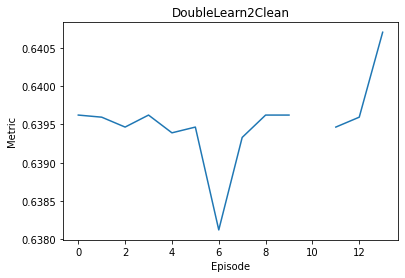

In [17]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='CART',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = False)
l2c_c1assification1.learn2clean()

Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.1421041488647461 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> LDA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.033888816833496094 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.02896595001220703 seconds


>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.6397403626518948

Classification done -- CPU time: 0.06319427490234375 seconds
End Pipeline CPU time: 0.1262969970703125 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> LDA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Norm

Initial number of rows: 16638
After deduplication: Number of rows: 16638
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 4312
After deduplication: Number of rows: 4312
Deduplication done -- CPU time: 0.022726058959960938 seconds


>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.6397403626518948

Classification done -- CPU time: 0.061653852462768555 seconds
End Pipeline CPU time: 0.08443284034729004 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> LDA

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 0.9656987190246582 seconds


>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.6397403626518948

Classification done -- CPU time: 0.057235002517700195 seconds
End Pi

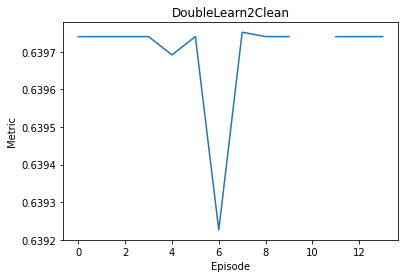

In [18]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='LDA',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = False)
l2c_c1assification1.learn2clean()

Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.13624024391174316 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> NB

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.02915215492248535 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.02320694923400879 seconds


>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.6397403614875804

Classification done -- CPU time: 0.07723784446716309 seconds
End Pipeline CPU time: 0.12983131408691406 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> NB

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
.

Initial number of rows: 16638
After deduplication: Number of rows: 16638
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 4312
After deduplication: Number of rows: 4312
Deduplication done -- CPU time: 0.028983116149902344 seconds


>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.6397403614875804

Classification done -- CPU time: 0.07219219207763672 seconds
End Pipeline CPU time: 0.10123395919799805 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> NB

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.0969438552856445 seconds


>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.6397403614875804

Classification done -- CPU t

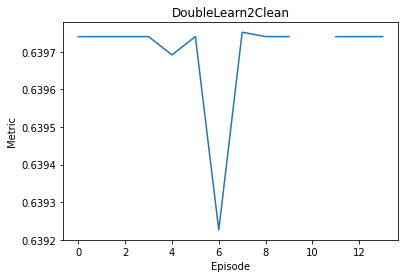

In [19]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='NB',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = False)
l2c_c1assification1.learn2clean()

Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.11988401412963867 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> LASSO

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.029254913330078125 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.02362990379333496 seconds


>>Regression task
Best alpha =  0.01
MSE of LASSO with 10  folds for cross-validation: 0.9578818763308197
Regression done -- CPU time: 0.04286789894104004 seconds
End Pipeline CPU time: 0.09597897529602051 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> LASSO

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... t

Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.494239091873169 seconds


>>Regression task
Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 1.1200509420228286
Regression done -- CPU time: 0.03915882110595703 seconds
End Pipeline CPU time: 1.533479928970337 seconds

Start pipeline
-------------

>>Regression task
Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 1.1692481800480066
Regression done -- CPU time: 0.053732872009277344 seconds
End Pipeline CPU time: 0.053775787353515625 seconds

==== Recap ====

List of strategies tried by Learn2Clean:
['DS -> IQR -> LASSO', 'MM -> AD -> LASSO', 'ZS -> ED -> LASSO', 'WR -> IQR -> LASSO', 'LC -> LOF -> LASSO', 'Tree -> ED -> LASSO', 'ZSB -> ED -> LASSO', 'LOF -> LASSO', 'IQR -> LASSO', 'CC -> LASSO', 'PC -> LASSO', 'ED -> LASSO', 'AD -> LASSO']

List of corresponding quality metrics ****
 [{'

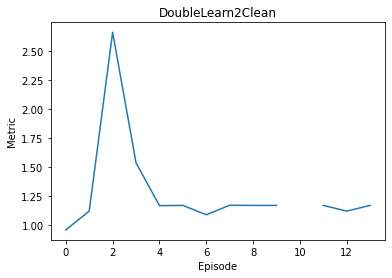

In [20]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='LASSO',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = False)
l2c_c1assification1.learn2clean()

Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.12253499031066895 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> OLS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.028994083404541016 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.023429155349731445 seconds


>>Regression task


const                     1.386425
New_ID                    0.057578
Sentiment_Polarity        0.005893
Sentiment_Subjectivity   -0.004562
dtype: float64

,const,New_ID,Sentiment_Polarity,Sentiment_Subjectivity
16385,1.0,0.788680,0.388889,0.000000
16387,1.0,0.788912,0.748685,0.620736
16388,1.0,0.789144,0.933333,0.794005
16389,1.0,0.789376,0.000000,1.000000
8,1.0,0.000000,0.102339,0.551263
...,...,...,...,...
16370,1.0,0.787520,0.388889,0.000000
16373,1.0,0.787752,0.388889,0.000000
16376,1.0,0.787984,0.697336,0.663386
16377,1.0,0.788216,0.774929,0.561682


(4,)

(4312, 4)

(4,)

(4312, 4)

MODIFICATION
MSE of OLS with 10  folds for cross-validation: 0.6962721254511635
Regression done -- CPU time: 0.029801368713378906 seconds
End Pipeline CPU time: 0.08260607719421387 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> OLS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.03487801551818848 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.6669621467590332 seconds


>>Regression task


const                     1.415539
Sentiment_Polarity        0.004708
Sentiment_Subjectivity   -0.003865
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity
8,1.0,0.102339,0.529579
9,1.0,0.827494,0.660262
12,1.0,0.888889,0.789116
16,1.0,0.388889,0.000000
20,1.0,0.792793,0.855631
...,...,...,...
20827,1.0,0.388889,0.000000
20850,1.0,0.388889,0.000000
20994,1.0,0.388889,0.000000
21108,1.0,0.388889,0.000000


(3,)

(4312, 3)

(3,)

(4312, 3)

MODIFICATION
MSE of OLS with 10  folds for cross-validation: 0.6960969011487299
Regression done -- CPU time: 0.028802156448364258 seconds
End Pipeline CPU time: 1.731071949005127 seconds


Strategy# 2 : Greedy traversal for starting state ZS
ZS -> ED -> OLS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.028176069259643555 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 16638
After deduplication: Number of rows: 16638
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 4312
After deduplication: Number of rows: 4312
Deduplication done -- CPU time: 0.04759716987609863 seconds


>>Regression task


const                     1.416456
Sentiment_Polarity        0.001332
Sentiment_Subjectivity   -0.001424
New_ID                    0.016624
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
8,1.0,-1.548377,0.393996,-1.731448
9,1.0,1.247473,0.734555,-1.730645
12,1.0,1.484182,1.070346,-1.729842
16,1.0,-0.443578,-0.986079,-1.729039
20,1.0,1.113682,1.243685,-1.728235
...,...,...,...,...
20827,1.0,-0.443578,-0.986079,1.728235
20850,1.0,-0.443578,-0.986079,1.729039
20994,1.0,-0.443578,-0.986079,1.729842
21108,1.0,-0.443578,-0.986079,1.730645


(4,)

(4312, 4)

(4,)

(4312, 4)

MODIFICATION
MSE of OLS with 10  folds for cross-validation: 0.6962832828665542
Regression done -- CPU time: 0.03186392784118652 seconds
End Pipeline CPU time: 0.10777020454406738 seconds


Strategy# 3 : Greedy traversal for starting state WR
WR -> IQR -> OLS

Start pipeline
-------------

>>Feature selection 
Before feature selection:
7 features 
Apply WR feature selection
Input variables must be non-negative. WR feature selection is only applied to positive variables.
After feature selection:
3 features remain
['Sentiment_Subjectivity', 'Sentiment_Polarity', 'New_ID']
Feature selection done -- CPU time: 0.019221782684326172 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.027391910552978516 seconds


>>Regression task


const                     1.386447
Sentiment_Polarity        0.005175
Sentiment_Subjectivity   -0.003704
New_ID                    0.000003
dtype: float64

,const,Sentiment_Subjectivity,Sentiment_Polarity,New_ID
16385,1.0,0.000000,0.388889,3401
16387,1.0,0.617669,0.747126,3402
16388,1.0,0.789116,0.933333,3403
16389,1.0,1.000000,0.000000,3404
8,1.0,0.529579,0.102339,1
...,...,...,...,...
16370,1.0,0.000000,0.388889,3396
16373,1.0,0.000000,0.388889,3397
16376,1.0,0.661383,0.689655,3398
16377,1.0,0.557142,0.776501,3399


(4,)

(4312, 4)

(4,)

(4312, 4)

MODIFICATION
MSE of OLS with 10  folds for cross-validation: 0.6960809212563149
Regression done -- CPU time: 0.030682086944580078 seconds
End Pipeline CPU time: 0.07933306694030762 seconds


Strategy# 4 : Greedy traversal for starting state LC
LC -> LOF -> OLS

Start pipeline
-------------

>>Feature selection 
Before feature selection:
7 features 
Apply LC feature selection with threshold= 0.3
1 features with linear correlation greater than 0.30.

List of correlated variables to be removed : ['Sentiment_Subjectivity']
After feature selection:
6 features remain
['Translated_Review', 'Sentiment_Polarity', 'New_ID', 'App', 'row', 'Sentiment']
Feature selection done -- CPU time: 0.016120195388793945 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.32437562942504883 seconds


>>Regression task


const                 1.386014
Sentiment_Polarity    0.004472
New_ID                0.000003
dtype: float64

,const,Sentiment_Polarity,New_ID
8,1.0,0.102339,1
9,1.0,0.827494,2
12,1.0,0.888889,3
24,1.0,0.388889,7
25,1.0,0.388889,8
...,...,...,...
20638,1.0,0.388889,4305
20649,1.0,0.388889,4306
20994,1.0,0.388889,4310
21108,1.0,0.388889,4311


(3,)

(4282, 3)

(3,)

(4282, 3)

MODIFICATION
MSE of OLS with 10  folds for cross-validation: 0.6944007712648154
Regression done -- CPU time: 0.02802300453186035 seconds
End Pipeline CPU time: 0.37033796310424805 seconds


Strategy# 5 : Greedy traversal for starting state Tree
Tree -> ED -> OLS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 16638
After deduplication: Number of rows: 16638
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 4312
After deduplication: Number of rows: 4312
Deduplication done -- CPU time: 0.04301905632019043 seconds


>>Regression task


const                     1.386447
Sentiment_Polarity        0.005175
Sentiment_Subjectivity   -0.003704
New_ID                    0.000003
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
8,1.0,0.102339,0.529579,1
9,1.0,0.827494,0.660262,2
12,1.0,0.888889,0.789116,3
16,1.0,0.388889,0.000000,4
20,1.0,0.792793,0.855631,5
...,...,...,...,...
20827,1.0,0.388889,0.000000,4308
20850,1.0,0.388889,0.000000,4309
20994,1.0,0.388889,0.000000,4310
21108,1.0,0.388889,0.000000,4311


(4,)

(4312, 4)

(4,)

(4312, 4)

MODIFICATION
MSE of OLS with 10  folds for cross-validation: 0.6959505438579942
Regression done -- CPU time: 0.03205108642578125 seconds
End Pipeline CPU time: 0.07514619827270508 seconds


Strategy# 6 : Greedy traversal for starting state ZSB
ZSB -> ED -> OLS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
3458 outlying rows have been removed:
* For test dataset
1007 outlying rows have been removed:
Outlier detection and removal done -- CPU time: 0.03272867202758789 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 13180
After deduplication: Number of rows: 13180
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 3305
After deduplication: Number of rows: 3305
Deduplication done -- CPU time: 0.0447690486907959 seconds


>>Regression task


const                     1.414980
Sentiment_Polarity       -0.032864
Sentiment_Subjectivity   -0.018300
New_ID                    0.000002
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
16385,1.0,0.388889,0.000000,3401
16387,1.0,0.747126,0.617669,3402
8,1.0,0.102339,0.529579,1
16394,1.0,0.107788,0.790249,3405
16,1.0,0.388889,0.000000,4
...,...,...,...,...
16366,1.0,0.388889,0.000000,3395
16370,1.0,0.388889,0.000000,3396
16373,1.0,0.388889,0.000000,3397
16376,1.0,0.689655,0.661383,3398


(4,)

(3305, 4)

(4,)

(3305, 4)

MODIFICATION
MSE of OLS with 10  folds for cross-validation: 0.6830562393390499
Regression done -- CPU time: 0.030241966247558594 seconds
End Pipeline CPU time: 0.10788416862487793 seconds


Strategy# 7 : Greedy traversal for starting state LOF
LOF -> OLS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.3311460018157959 seconds


>>Regression task


const                     1.386073
Sentiment_Polarity        0.005046
Sentiment_Subjectivity   -0.003741
New_ID                    0.000004
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
8,1.0,0.102339,0.529579,1
9,1.0,0.827494,0.660262,2
12,1.0,0.888889,0.789116,3
23,1.0,0.078947,0.557142,6
24,1.0,0.388889,0.000000,7
...,...,...,...,...
20649,1.0,0.388889,0.000000,4306
20805,1.0,0.029240,0.938272,4307
20994,1.0,0.388889,0.000000,4310
21108,1.0,0.388889,0.000000,4311


(4,)

(4282, 4)

(4,)

(4282, 4)

MODIFICATION
MSE of OLS with 10  folds for cross-validation: 0.6959820565749827
Regression done -- CPU time: 0.03042006492614746 seconds
End Pipeline CPU time: 0.3616340160369873 seconds


Strategy# 8 : Greedy traversal for starting state IQR
IQR -> OLS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.034271955490112305 seconds


>>Regression task


const                     1.386447
Sentiment_Polarity        0.005175
Sentiment_Subjectivity   -0.003704
New_ID                    0.000003
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
16385,1.0,0.388889,0.000000,3401
16387,1.0,0.747126,0.617669,3402
16388,1.0,0.933333,0.789116,3403
16389,1.0,0.000000,1.000000,3404
8,1.0,0.102339,0.529579,1
...,...,...,...,...
16370,1.0,0.388889,0.000000,3396
16373,1.0,0.388889,0.000000,3397
16376,1.0,0.689655,0.661383,3398
16377,1.0,0.776501,0.557142,3399


(4,)

(4312, 4)

(4,)

(4312, 4)

MODIFICATION
MSE of OLS with 10  folds for cross-validation: 0.6959505438579939
Regression done -- CPU time: 0.03039383888244629 seconds
End Pipeline CPU time: 0.06474900245666504 seconds


Strategy# 9 : Greedy traversal for starting state CC
CC -> OLS

Start pipeline
-------------
>>Consistency checking
* For train dataset
Constraints from the file: gpsu_example_constraints.tdda
Constraints passing: 16

Constraints failing: 2

* For test dataset
Constraints from the file: gpsu_example_constraints.tdda
Constraints passing: 16

Constraints failing: 2

Consistency checking done -- CPU time: 0.11608481407165527 seconds

>>Regression task


const                     1.386447
Sentiment_Polarity        0.005175
Sentiment_Subjectivity   -0.003704
New_ID                    0.000003
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
8,1.0,0.102339,0.529579,1
9,1.0,0.827494,0.660262,2
12,1.0,0.888889,0.789116,3
16,1.0,0.388889,0.000000,4
20,1.0,0.792793,0.855631,5
...,...,...,...,...
20827,1.0,0.388889,0.000000,4308
20850,1.0,0.388889,0.000000,4309
20994,1.0,0.388889,0.000000,4310
21108,1.0,0.388889,0.000000,4311


(4,)

(4312, 4)

(4,)

(4312, 4)

MODIFICATION
MSE of OLS with 10  folds for cross-validation: 0.6959505438579942
Regression done -- CPU time: 0.030704975128173828 seconds
End Pipeline CPU time: 0.14685273170471191 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> OLS

Start pipeline
-------------
>>Consistency checking
* For train dataset
Number of pattern violations on variable ' App 'for pattern# 0 : 15329
Number of pattern violations on variable ' Sentiment 'for pattern# 0 : 16638
No record from the dataset satisfied the patterns!
Will return empty dataset - please change our patterns
* For test dataset
Number of pattern violations on variable ' App 'for pattern# 0 : 3916
Number of pattern violations on variable ' Sentiment 'for pattern# 0 : 4312
No record from the dataset satisfied the patterns!
Will return empty dataset - please change our patterns
Consistency checking done -- CPU time: 0.08638620376586914 seconds

>>Regression task
Error: Need at least one continous variable and  10  observat

const                     1.386447
Sentiment_Polarity        0.005175
Sentiment_Subjectivity   -0.003704
New_ID                    0.000003
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
8,1.0,0.102339,0.529579,1
9,1.0,0.827494,0.660262,2
12,1.0,0.888889,0.789116,3
16,1.0,0.388889,0.000000,4
20,1.0,0.792793,0.855631,5
...,...,...,...,...
20827,1.0,0.388889,0.000000,4308
20850,1.0,0.388889,0.000000,4309
20994,1.0,0.388889,0.000000,4310
21108,1.0,0.388889,0.000000,4311


(4,)

(4312, 4)

(4,)

(4312, 4)

MODIFICATION
MSE of OLS with 10  folds for cross-validation: 0.6959505438579942
Regression done -- CPU time: 0.0322413444519043 seconds
End Pipeline CPU time: 0.07342004776000977 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> OLS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.6314051151275635 seconds


>>Regression task


const                     1.415539
Sentiment_Polarity        0.004708
Sentiment_Subjectivity   -0.003865
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity
8,1.0,0.102339,0.529579
9,1.0,0.827494,0.660262
12,1.0,0.888889,0.789116
16,1.0,0.388889,0.000000
20,1.0,0.792793,0.855631
...,...,...,...
20827,1.0,0.388889,0.000000
20850,1.0,0.388889,0.000000
20994,1.0,0.388889,0.000000
21108,1.0,0.388889,0.000000


(3,)

(4312, 3)

(3,)

(4312, 3)

MODIFICATION
MSE of OLS with 10  folds for cross-validation: 0.6960969011487299
Regression done -- CPU time: 0.026794910430908203 seconds
End Pipeline CPU time: 1.6582820415496826 seconds

Start pipeline
-------------

>>Regression task


const                     1.386447
Sentiment_Polarity        0.005175
Sentiment_Subjectivity   -0.003704
New_ID                    0.000003
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
8,1.0,0.102339,0.529579,1
9,1.0,0.827494,0.660262,2
12,1.0,0.888889,0.789116,3
16,1.0,0.388889,0.000000,4
20,1.0,0.792793,0.855631,5
...,...,...,...,...
20827,1.0,0.388889,0.000000,4308
20850,1.0,0.388889,0.000000,4309
20994,1.0,0.388889,0.000000,4310
21108,1.0,0.388889,0.000000,4311


(4,)

(4312, 4)

(4,)

(4312, 4)

MODIFICATION
MSE of OLS with 10  folds for cross-validation: 0.6959505438579942
Regression done -- CPU time: 0.04043984413146973 seconds
End Pipeline CPU time: 0.0404820442199707 seconds

==== Recap ====

List of strategies tried by Learn2Clean:
['DS -> IQR -> OLS', 'MM -> AD -> OLS', 'ZS -> ED -> OLS', 'WR -> IQR -> OLS', 'LC -> LOF -> OLS', 'Tree -> ED -> OLS', 'ZSB -> ED -> OLS', 'LOF -> OLS', 'IQR -> OLS', 'CC -> OLS', 'PC -> OLS', 'ED -> OLS', 'AD -> OLS']

List of corresponding quality metrics ****
 [{'quality_metric': 0.6962721254511635}, {'quality_metric': 0.6960969011487299}, {'quality_metric': 0.6962832828665542}, {'quality_metric': 0.6960809212563149}, {'quality_metric': 0.6944007712648154}, {'quality_metric': 0.6959505438579942}, {'quality_metric': 0.6830562393390499}, {'quality_metric': 0.6959820565749827}, {'quality_metric': 0.6959505438579939}, {'quality_metric': 0.6959505438579942}, {'quality_metric': None}, {'quality_metric': 0.6959505438579942}, {'quality_metric': 0.6

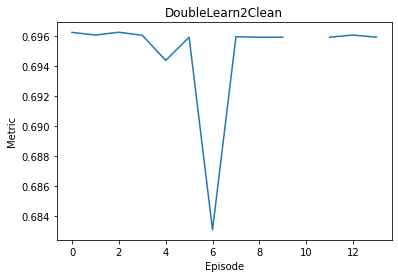

In [21]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='OLS',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = False)
l2c_c1assification1.learn2clean()

Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.12543201446533203 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> MARS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.028499126434326172 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.02295398712158203 seconds


>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.44940549534418944
Regression done -- CPU time: 4.474577903747559 seconds
End Pipeline CPU time: 4.526190996170044 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> MARS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization 

MSE of MARS with 10 folds for cross-validation: 0.4493328060184634
Regression done -- CPU time: 4.568078994750977 seconds
End Pipeline CPU time: 4.612673997879028 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> MARS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.9873619079589844 seconds


>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.4487826482091177
Regression done -- CPU time: 1.4205188751220703 seconds
End Pipeline CPU time: 3.408450126647949 seconds

Start pipeline
-------------

>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.4493328060184634
Regression done -- CPU time: 4.616015911102295 seconds
End Pipeline CPU time: 4.616049766540527 seconds

==== Recap ====

List of strategies tried b

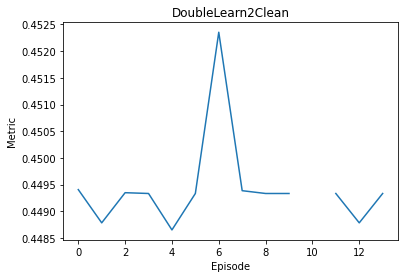

In [22]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='MARS',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = False)
l2c_c1assification1.learn2clean()

Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.14984917640686035 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> HCA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.03409314155578613 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.02997899055480957 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.5426  for k= 3
Quality of clustering 0.5426
Clustering done -- CPU time: 36.61715078353882 seconds
End Pipeline CPU time: 36.6939640045166 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> HCA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train data

Best silhouette = 0.6164  for k= 2
Quality of clustering 0.6164
Clustering done -- CPU time: 31.144444227218628 seconds
End Pipeline CPU time: 31.196793794631958 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> HCA

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 2.8515379428863525 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.8283  for k= 3
Quality of clustering 0.8283
Clustering done -- CPU time: 46.16472029685974 seconds
End Pipeline CPU time: 49.0196168422699 seconds

Start pipeline
-------------

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.6164  for k= 2
Quality of clustering 0.6164
Clustering done -- CPU time: 30.39

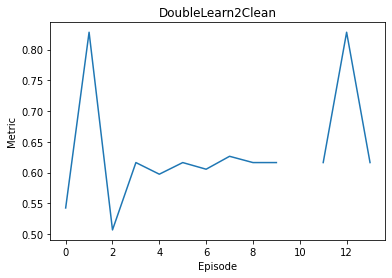

In [23]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='HCA',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = False)
l2c_c1assification1.learn2clean()

Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.13703703880310059 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> KMEANS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.02939295768737793 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.024342060089111328 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.5426  for k= 3
Quality of clustering 0.5426
Clustering done -- CPU time: 14.640161752700806 seconds
End Pipeline CPU time: 14.69712209701538 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> KMEANS

Start pipeline
-------------
>>Normalization 
* For train dataset
... t

Best silhouette = 0.6267  for k= 2
Quality of clustering 0.6267
Clustering done -- CPU time: 16.082894802093506 seconds
End Pipeline CPU time: 16.138883113861084 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> KMEANS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 2.199878215789795 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.8283  for k= 3
Quality of clustering 0.8283
Clustering done -- CPU time: 14.550040245056152 seconds
End Pipeline CPU time: 16.750411987304688 seconds

Start pipeline
-------------

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.6267  for k= 2
Quality of clustering 0.6267
Clustering done -- CPU time: 

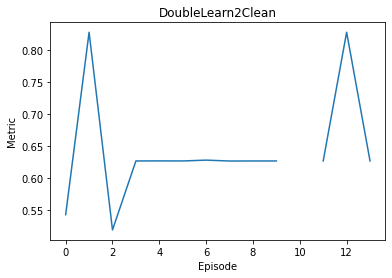

In [24]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='KMEANS',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = False)
l2c_c1assification1.learn2clean()

## Random data preprocessing pipelines

In [30]:
import learn2clean.loading.reader as rd 
import learn2clean.qlearning.qlearner as ql

# d_enc = rd.Reader(sep=',',verbose=False, encoding=True) 
# gpsu  = ["../datasets/googleplaystore_reviews.csv"]
# gpsu_encoded = d_enc.train_test_split(gpsu, 'Sentiment')

# the results of random cleaning are stored in 'gpsu_example'_results_file.txt in 'save' directory
# appended to the EOF 
# random pipeline for LDA classification
random1=ql.Qlearner(gpsu_encoded.copy(),goal='CART',target_goal='Sentiment',target_prepare=None, verbose = False)
random1.random_cleaning('gpsu_example')

random2=ql.Qlearner(gpsu_encoded.copy(),goal='LDA',target_goal='Sentiment',target_prepare=None, verbose = False)
random2.random_cleaning('gpsu_example')

random3=ql.Qlearner(gpsu_encoded.copy(),goal='NB',target_goal='Sentiment',target_prepare=None, verbose = False)
random3.random_cleaning('gpsu_example')

random4=ql.Qlearner(gpsu_encoded.copy(),goal='LASSO',target_goal='Sentiment',target_prepare=None, verbose = False)
random4.random_cleaning('gpsu_example')

random5=ql.Qlearner(gpsu_encoded.copy(),goal='OLS',target_goal='Sentiment',target_prepare=None, verbose = False)
random5.random_cleaning('gpsu_example')

random6=ql.Qlearner(gpsu_encoded.copy(),goal='MARS',target_goal='Sentiment',target_prepare=None, verbose = False)
random6.random_cleaning('gpsu_example')

random7=ql.Qlearner(gpsu_encoded.copy(),goal='HCA',target_goal='Sentiment',target_prepare=None, verbose = False)
random7.random_cleaning('gpsu_example')

random8=ql.Qlearner(gpsu_encoded.copy(),goal='KMEANS',target_goal='Sentiment',target_prepare=None, verbose = False)
random8.random_cleaning('gpsu_example')


# gpsu_encoded['train']




--------------------------
Random cleaning strategy:
 KNN -> DS -> MR -> ZSB -> ED -> CART
--------------------------

Start pipeline
-------------
>>Imputation 
* For train dataset
Before imputation:
Total 72055 missing values in ['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
- 36026 numerical missing values in ['Sentiment_Polarity', 'Sentiment_Subjectivity']
- 36029 non-numerical missing values in ['Translated_Review', 'Sentiment']
After imputation:
Total 67096 missing values
- 0 numerical missing values
- 67096 non-numerical missing values
* For test dataset
Before imputation:
Total 35402 missing values in ['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
- 17700 numerical missing values in ['Sentiment_Polarity', 'Sentiment_Subjectivity']
- 17702 non-numerical missing values in ['Translated_Review', 'Sentiment']
After imputation:
Total 47855 missing values
- 0 numerical missing values
- 47855 non-numerical missin

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([    3,     4,    14,    28,    57,\n            ...\n            42358, 42393, 42511, 42943, 43022],\n           dtype='int64', length=975). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [26]:
# no preprocessing: results appended to the EOF 'gpsu_example'_results.txt 

no_prep1=ql.Qlearner(gpsu_encoded.copy(),goal='HCA',target_goal='Sentiment',target_prepare=None, verbose = False)
no_prep1.no_prep('gpsu_example')

no_prep2=ql.Qlearner(gpsu_encoded.copy(),goal='LDA',target_goal='Sentiment',target_prepare=None, verbose = False)
no_prep2.no_prep('gpsu_example')

no_prep3=ql.Qlearner(gpsu_encoded.copy(),goal='NB',target_goal='Sentiment',target_prepare=None, verbose = False)
no_prep3.no_prep('gpsu_example')


Start pipeline
-------------

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.4484  for k= 2
Quality of clustering 0.4484
Clustering done -- CPU time: 112.53855991363525 seconds
End Pipeline CPU time: 112.56373715400696 seconds

Start pipeline
-------------

>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.9271851510392491

Classification done -- CPU time: 0.17129778861999512 seconds
End Pipeline CPU time: 0.18309617042541504 seconds

Start pipeline
-------------

>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.9680363599408661

Classification done -- CPU time: 0.2621622085571289 seconds
End Pipeline CPU time: 0.27580904960632324 seconds
